In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_theme()

In [2]:
metrics = pd.read_pickle(Path("metrics.pkl"))

In [3]:
def minseries(series):
    s = []
    for i in series:
        if s:
            s.append(min(s[-1], i))
        else:
            s.append(i)
    return s

def val_err_weights(df, task):
    s = []
    for index, i in df.iterrows():
        if s:
            if i['val_error'] < s[-1]['val_error']:
                s.append({'step': i['Step'], 'task': task, 'val_error': i['val_error'], 'total_weights': i['total_weights'], 'total_macs': i['total_macs']})
            else:
                s.append(s[-1])
        else:
            s.append({'step': i['Step'], 'task': task, 'val_error': i['val_error'], 'total_weights': i['total_weights'], 'total_macs': i['total_macs']})
    return s

In [4]:
tasks = list(metrics['Task'].unique())
print(tasks)
task = tasks[-1]

['500k', '500k_noap', '500k_ap', '500k_ap_nc', '500k_nogpc', '500k_new']


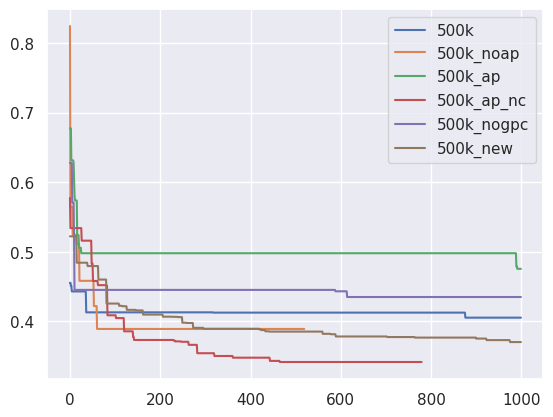

In [5]:
selected_tasks = tasks
for t in selected_tasks:
    plt.plot(minseries(metrics[metrics["Task"] == t]["val_error"]), label=t)
plt.legend()
plt.show()


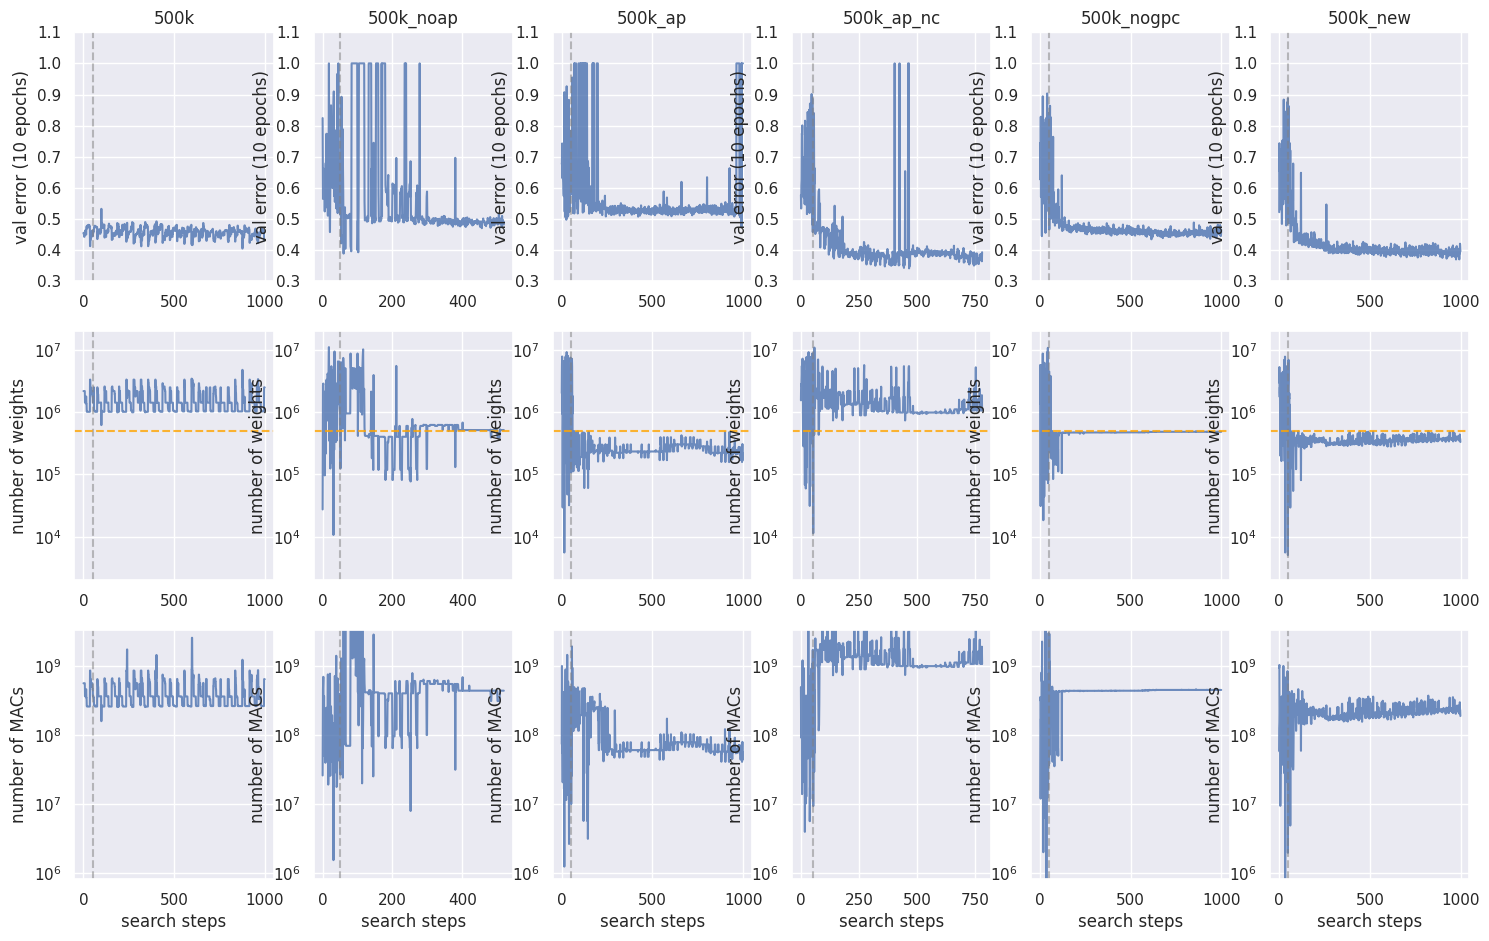

In [7]:
t = tasks # ['500k_nogpc', '500k_new']
fig, ax = plt.subplots(3, len(t), figsize=(len(t) * 3, 11), squeeze=False)
lengths = []

for i, task in enumerate(t):
    # ax[0][i].set_title(task.replace("_cifar10", ""))
    ax[0][i].set_title(task)
    ax[0][i].plot(metrics[metrics['Task'] == task]['val_error'], alpha=0.8)
    ax[1][i].plot(metrics[metrics['Task'] == task]['total_weights'], alpha=0.8)
    ax[2][i].plot(metrics[metrics['Task'] == task]['total_macs'], alpha=0.8)

    # ax[0][i].plot(df[df['task'] == task]['val_error'], label="best: {:.3f}".format(metrics[metrics["Task"] == task]['val_error'].min()))
    # ax[1][i].plot(df[df['task'] == task]['total_weights'], label="best")
    # ax[2][i].plot(df[df['task'] == task]['total_macs'], label="best")



    ax[0, i].axvline(50, linestyle='--', color="grey", alpha=0.5)
    ax[1, i].axvline(50, linestyle='--', color="grey", alpha=0.5)
    ax[2, i].axvline(50, linestyle='--', color="grey", alpha=0.5)

    ax[1, i].axhline(500000, linestyle='--', color="orange", alpha=0.8)
    # ax[2, i].axhline(128000000, linestyle='--', color="orange", alpha=0.8)


for a in ax.T:
    # for a_ in a:
        # a_.legend()
        # a_.set_xlim(-20, 600)
    a[0].set_ylim(0.3, 1.1)
    a[1].set_ylim(2e3, 2e7)
    a[1].set_yscale("log")
    a[2].set_ylim(8e5, 3.3e9)
    a[2].set_yscale('log')

    a[2].set_xlabel("search steps")
    a[0].set_ylabel("val error (10 epochs)")
    a[1].set_ylabel("number of weights")
    a[2].set_ylabel("number of MACs")
# plt.savefig("/home/moritz/publications/symbolic_expressions/assets/withinitconstraints.pdf")
plt.show()

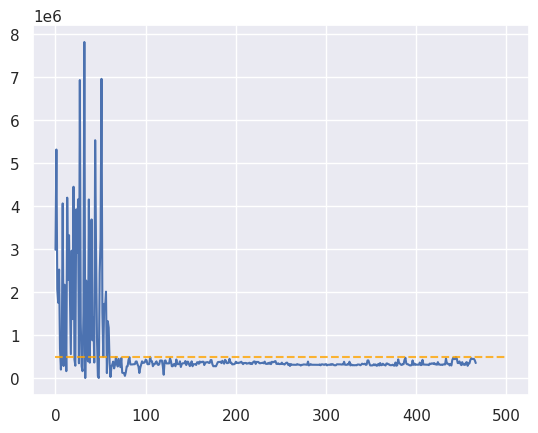

In [8]:
plt.plot(metrics[metrics["Task"] == "500k_new"]["total_weights"])
plt.hlines(xmin=0, xmax=500, y=500000, linestyle='--', color="orange", alpha=0.8)


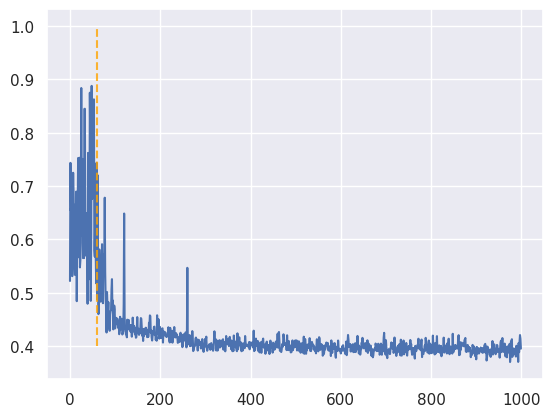

In [18]:
plt.plot(metrics[metrics["Task"] == "500k_new"]["val_error"])
plt.vlines(ymin=0.4, ymax=1, x=60, linestyle='--', color="orange", alpha=0.8)

In [11]:
m = metrics[metrics["Task"] == "500k_new"]

In [8]:
params = pd.read_pickle(Path("parameters.pkl"))

In [16]:
minidx = m["val_error"].idxmin()
m.iloc[minidx]

Task                500k_new
Step                     975
est_act             917504.0
ff                  3.148254
total_act          5895604.0
total_macs       253569440.0
total_weights       397196.0
val_error           0.370393
Name: 975, dtype: object

In [17]:
params["500k_new"][minidx]

{'embedded_vision_net_0.ChoiceOp_0.num_blocks': 2,
 'embedded_vision_net_0.block_0.ChoiceOp_0.depth': 1,
 'embedded_vision_net_0.block_0.ChoiceOp_1.residual_choice': 0,
 'embedded_vision_net_0.block_0.pattern_0.ChoiceOp_0.choice': 0,
 'embedded_vision_net_0.block_0.pattern_0.Conv2d_0.stride': 1,
 'embedded_vision_net_0.block_0.pattern_0.Conv2d_0.weight.kernel_size': 3,
 'embedded_vision_net_0.block_0.pattern_0.Conv2d_0.weight.out_channels': 112,
 'embedded_vision_net_0.block_0.pattern_0.expand_reduce_0.expansion_0.Conv2d_0.weight.expand_ratio': 3,
 'embedded_vision_net_0.block_0.pattern_0.pooling_0.ChoiceOp_0.pool_mode': 1,
 'embedded_vision_net_0.block_0.pattern_0.reduce_expand_0.reduction_0.Conv2d_0.weight.reduce_ratio': 2,
 'embedded_vision_net_0.block_0.pattern_1.ChoiceOp_0.choice': 3,
 'embedded_vision_net_0.block_0.pattern_1.Conv2d_0.weight.kernel_size': 3,
 'embedded_vision_net_0.block_0.pattern_1.Conv2d_0.weight.out_channels': 240,
 'embedded_vision_net_0.block_0.pattern_1.expa

In [17]:
p = params["500k_nogpc"]
p = pd.DataFrame(p)

In [35]:
df = metrics[metrics["Task"] == "500k_nogpc"]

In [37]:
df.iloc[150:190]

,Task,Step,est_act,ff,total_act,total_macs,total_weights,val_error
150,500k_nogpc,150,1900544.0,4.053026,8586276.0,433852288.0,471844.0,0.467147
151,500k_nogpc,151,1900544.0,2.112085,8586276.0,433852288.0,471844.0,0.463341
152,500k_nogpc,152,1900544.0,0.783308,8586276.0,433852288.0,471844.0,0.470753
153,500k_nogpc,153,1900544.0,2.587885,8586276.0,433852288.0,471844.0,0.469151
154,500k_nogpc,154,1900544.0,1.119374,8524836.0,432127872.0,470160.0,0.479968
155,500k_nogpc,155,1900544.0,3.182941,8524836.0,432127872.0,470160.0,0.476162
156,500k_nogpc,156,1900544.0,3.472558,8524836.0,432127872.0,470160.0,0.465745
157,500k_nogpc,157,1900544.0,1.344470,8524836.0,432127872.0,470160.0,0.469151
158,500k_nogpc,158,1900544.0,4.405053,8182820.0,425664384.0,463848.0,0.494992
159,500k_nogpc,159,1900544.0,2.596957,8166676.0,427020896.0,431612.0,0.495393


In [18]:
p.loc[346].compare(p.loc[347])

,self,other


In [17]:
from tqdm import tqdm
val_errors = []
for i in tqdm(range(1000)):
    try:
        m = pd.read_json(Path(f"trained_models/ae_nas_ap_cifar100_w500k/embedded_vision_net/performance_data/performance_data/model_{i}.json"))["metrics"]["val_error"]
        val_errors.append(m)
    except Exception:
        pass

100%|██████████| 1000/1000 [00:01<00:00, 955.81it/s]


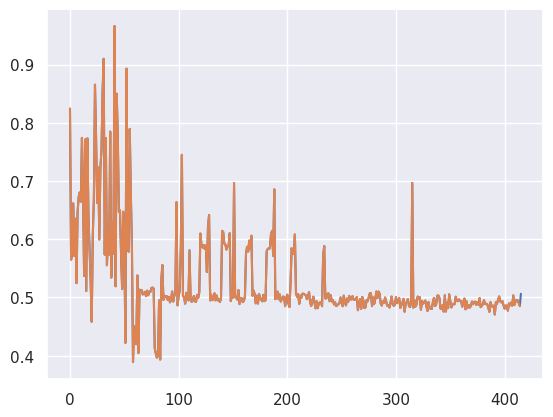

In [19]:
d = metrics[(metrics["Task"] == "500k_ap") & (metrics["val_error"] < 1)]["val_error"]

plt.plot(val_errors)
plt.plot(range(len(d)), d)

In [32]:
print(len(d))
print(len(val_errors))

1000
992


In [34]:
metrics[(metrics["Task"] == "500k") & (metrics["total_weights"] == 2185572.0)]

,Task,Step,est_act,ff,total_act,total_macs,total_weights,val_error
0,500k,0,552960.0,4.226082,3605812.0,559388832.0,2185572.0,0.455529
1,500k,1,552960.0,4.226082,3605812.0,559388832.0,2185572.0,0.455529
2,500k,2,552960.0,3.915827,3605812.0,559388832.0,2185572.0,0.451122
3,500k,3,552960.0,3.915827,3605812.0,559388832.0,2185572.0,0.451122
4,500k,4,552960.0,3.332973,3605812.0,559388832.0,2185572.0,0.443109
5,500k,5,552960.0,3.332973,3605812.0,559388832.0,2185572.0,0.443109
6,500k,6,552960.0,3.506566,3605812.0,559388832.0,2185572.0,0.451923
7,500k,7,552960.0,3.506566,3605812.0,559388832.0,2185572.0,0.451923
44,500k,44,552960.0,2.362979,3605812.0,559388832.0,2185572.0,0.458934
45,500k,45,552960.0,2.362979,3605812.0,559388832.0,2185572.0,0.458934


In [37]:
metrics[(metrics["Task"] == "500k") & (metrics["val_error"] > 0.4735) & (metrics["val_error"] < 0.474)]

,Task,Step,est_act,ff,total_act,total_macs,total_weights,val_error
34,500k,34,245760.0,0.452543,1533460.0,256902240.0,1015140.0,0.473758
35,500k,35,245760.0,0.452543,1533460.0,256902240.0,1015140.0,0.473758
64,500k,64,245760.0,3.322315,1533460.0,256902240.0,1015140.0,0.473958
65,500k,65,245760.0,3.322315,1533460.0,256902240.0,1015140.0,0.473958
104,500k,104,245760.0,3.159152,1533460.0,256902240.0,1015140.0,0.473758
105,500k,105,245760.0,3.159152,1533460.0,256902240.0,1015140.0,0.473758
230,500k,230,245760.0,1.299971,1533460.0,256902240.0,1015140.0,0.473758
231,500k,231,245760.0,1.299971,1533460.0,256902240.0,1015140.0,0.473758
346,500k,346,245760.0,4.254189,1533460.0,256902240.0,1015140.0,0.473758
347,500k,347,245760.0,4.254189,1533460.0,256902240.0,1015140.0,0.473758


In [35]:
for i, j in zip(val_errors, d):
    match = np.allclose(i, j)
    print("{:.>4f} : {:.>4f} --- {}".format(i, j, str(match)))

0.579928 : 0.455529 --- False
0.683694 : 0.455529 --- False
0.857372 : 0.451122 --- False
0.501803 : 0.451122 --- False
0.502805 : 0.443109 --- False
0.469351 : 0.443109 --- False
0.685497 : 0.451923 --- False
0.518229 : 0.451923 --- False
0.574720 : 0.461138 --- False
0.845954 : 0.461138 --- False
0.681490 : 0.458333 --- False
0.813702 : 0.458333 --- False
0.784255 : 0.465345 --- False
0.657452 : 0.465345 --- False
0.819111 : 0.450321 --- False
0.503606 : 0.450321 --- False
0.744591 : 0.475962 --- False
0.473558 : 0.475962 --- False
0.771034 : 0.474960 --- False
0.581330 : 0.474960 --- False
0.476763 : 0.470152 --- False
0.578926 : 0.470152 --- False
0.512019 : 0.479567 --- False
0.791667 : 0.479567 --- False
0.679688 : 0.476763 --- False
0.726362 : 0.476763 --- False
0.667869 : 0.474159 --- False
0.742588 : 0.474159 --- False
0.767428 : 0.481571 --- False
0.574720 : 0.481571 --- False
0.695913 : 0.476562 --- False
0.615585 : 0.476562 --- False
0.681090 : 0.480168 --- False
0.764223 :

In [19]:
dupes = metrics[metrics["Task"] == "500k_new"].pivot_table(index = ['total_weights'], aggfunc ='size')